In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2.2 Erstellen Sie ein Modell zur Vorhersage der Reaktionszeit für Brandeinsätze

- Verwenden Sie mission_count_fire und mission_count_ems_critical als Eingabefunktionen für Ihr Modell.
- Bauen Sie ein lineares Regressionsmodell, das die durchschnittliche Reaktionszeit für Brandeinsätze (response_time_fire_time_to_first_pump_mean) vorhersagt.
- Bewerten Sie das Modell anhand der mittleren quadratischen Abweichung (MSE), um die Genauigkeit Ihrer Vorhersagen zu prüfe

In [21]:
df = pd.read_csv("../data/BFw_mission_data_daily.csv", skipfooter=1, engine="python")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   mission_created_date                            2569 non-null   object 
 1   mission_count_all                               2569 non-null   int64  
 2   mission_count_ems                               2569 non-null   int64  
 3   mission_count_ems_critical                      2569 non-null   int64  
 4   mission_count_ems_critical_cpr                  2569 non-null   int64  
 5   mission_count_fire                              2569 non-null   int64  
 6   mission_count_technical_rescue                  2569 non-null   int64  
 7   response_time_ems_critical_mean                 2569 non-null   float64
 8   response_time_ems_critical_median               2569 non-null   float64
 9   response_time_ems_critical_std           

In [22]:
relevant_cols = df[["mission_count_fire", "mission_count_ems_critical",
    "response_time_fire_time_to_first_pump_mean"]]
relevant_cols

,mission_count_fire,mission_count_ems_critical,response_time_fire_time_to_first_pump_mean
0,393,1019,668.621951
1,34,988,530.538462
2,32,1081,580.583333
3,30,1053,574.416667
4,38,1033,541.964286
...,...,...,...
2564,38,1029,627.200000
2565,51,1008,584.161290
2566,45,955,566.214286
2567,73,1061,566.500000


In [23]:
relevant_cols["response_time_fire_time_to_first_pump_mean"].nunique()

2484

In [29]:
scaler  = StandardScaler()

scaled_cols = scaler.fit_transform(relevant_cols)
scaled_cols = pd.DataFrame(scaled_cols, columns=relevant_cols.columns)

In [30]:
scaled_cols

,mission_count_fire,mission_count_ems_critical,response_time_fire_time_to_first_pump_mean
0,12.209763,-0.074855,1.404211
1,-0.484884,-0.321021,-2.193673
2,-0.555606,0.417477,-0.889711
3,-0.626328,0.195133,-1.050388
4,-0.343439,0.036316,-1.895963
...,...,...,...
2564,-0.343439,0.004553,0.324927
2565,0.116255,-0.162205,-0.796484
2566,-0.095911,-0.583069,-1.264108
2567,0.894200,0.258660,-1.256664


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_cols.drop("response_time_fire_time_to_first_pump_mean", axis=1),
    scaled_cols["response_time_fire_time_to_first_pump_mean"],
    test_size=0.2,
    random_state=73
    )

In [32]:
# Lineare Regression
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

lin_model.score(X_test, y_test)

0.02527047411006267

In [40]:
# Entscheidungsbaum
decision_tree = DecisionTreeRegressor()

decision_tree.fit(X_train, y_train)

decision_tree.score(X_test, y_test)

-0.8910063766056622

<Axes: >

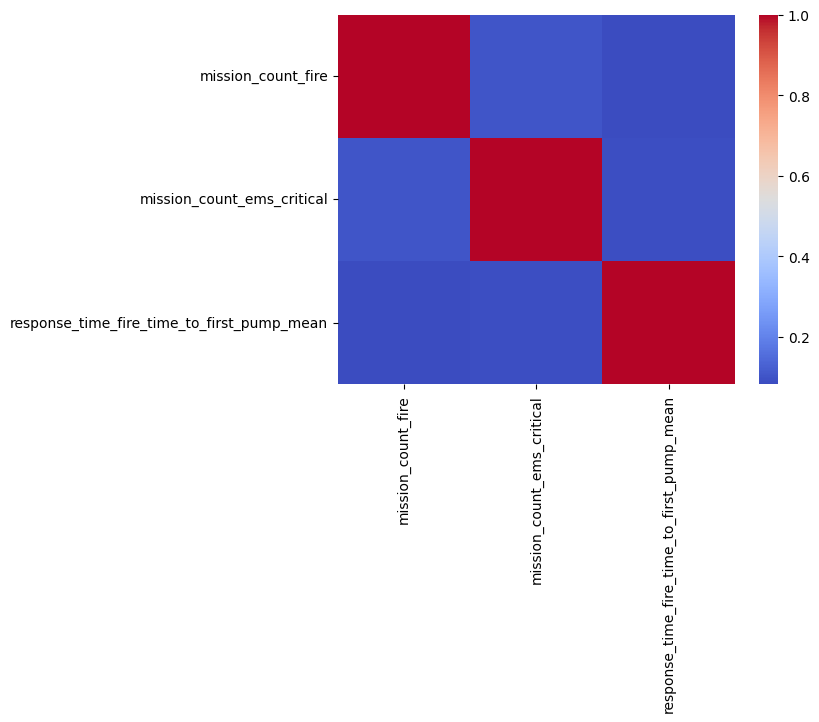

In [39]:
import seaborn as sns

sns.heatmap(relevant_cols.corr(), cmap="coolwarm")

<Axes: xlabel='mission_count_ems_critical', ylabel='response_time_fire_time_to_first_pump_mean'>

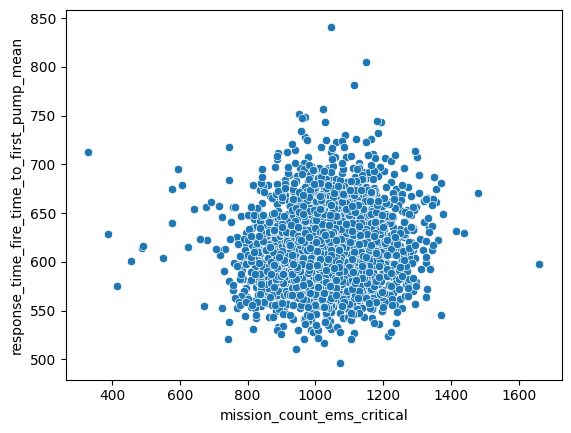

In [57]:
sns.scatterplot(relevant_cols, x="mission_count_fire",
                y="response_time_fire_time_to_first_pump_mean")

In [60]:
grouped_by_mission_count_fire = relevant_cols.groupby("mission_count_fire")[
    "response_time_fire_time_to_first_pump_mean"].mean()
grouped_by_mission_count_fire

mission_count_fire
12     613.000000
14     712.750000
15     712.700000
19     618.546970
20     597.002083
          ...    
393    668.621951
511    730.173913
564    578.231156
573    597.464387
676    781.916890
Name: response_time_fire_time_to_first_pump_mean, Length: 98, dtype: float64

In [65]:
import plotly.express as px

px.line(grouped_by_mission_count_fire)

In [64]:
cropped_data = relevant_cols[relevant_cols["mission_count_fire"] < 90]
X_train, X_test, y_train, y_test = train_test_split(
    cropped_data.drop(["response_time_fire_time_to_first_pump_mean"], axis=1),
    cropped_data["response_time_fire_time_to_first_pump_mean"],
    test_size=0.2,
    random_state=73
)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.03443057843393604

In [116]:
corr_to_target = df.corr(numeric_only=True)[["response_time_fire_time_to_first_pump_mean"]].sort_values(by="response_time_fire_time_to_first_pump_mean")
# corr_to_target

<Axes: >

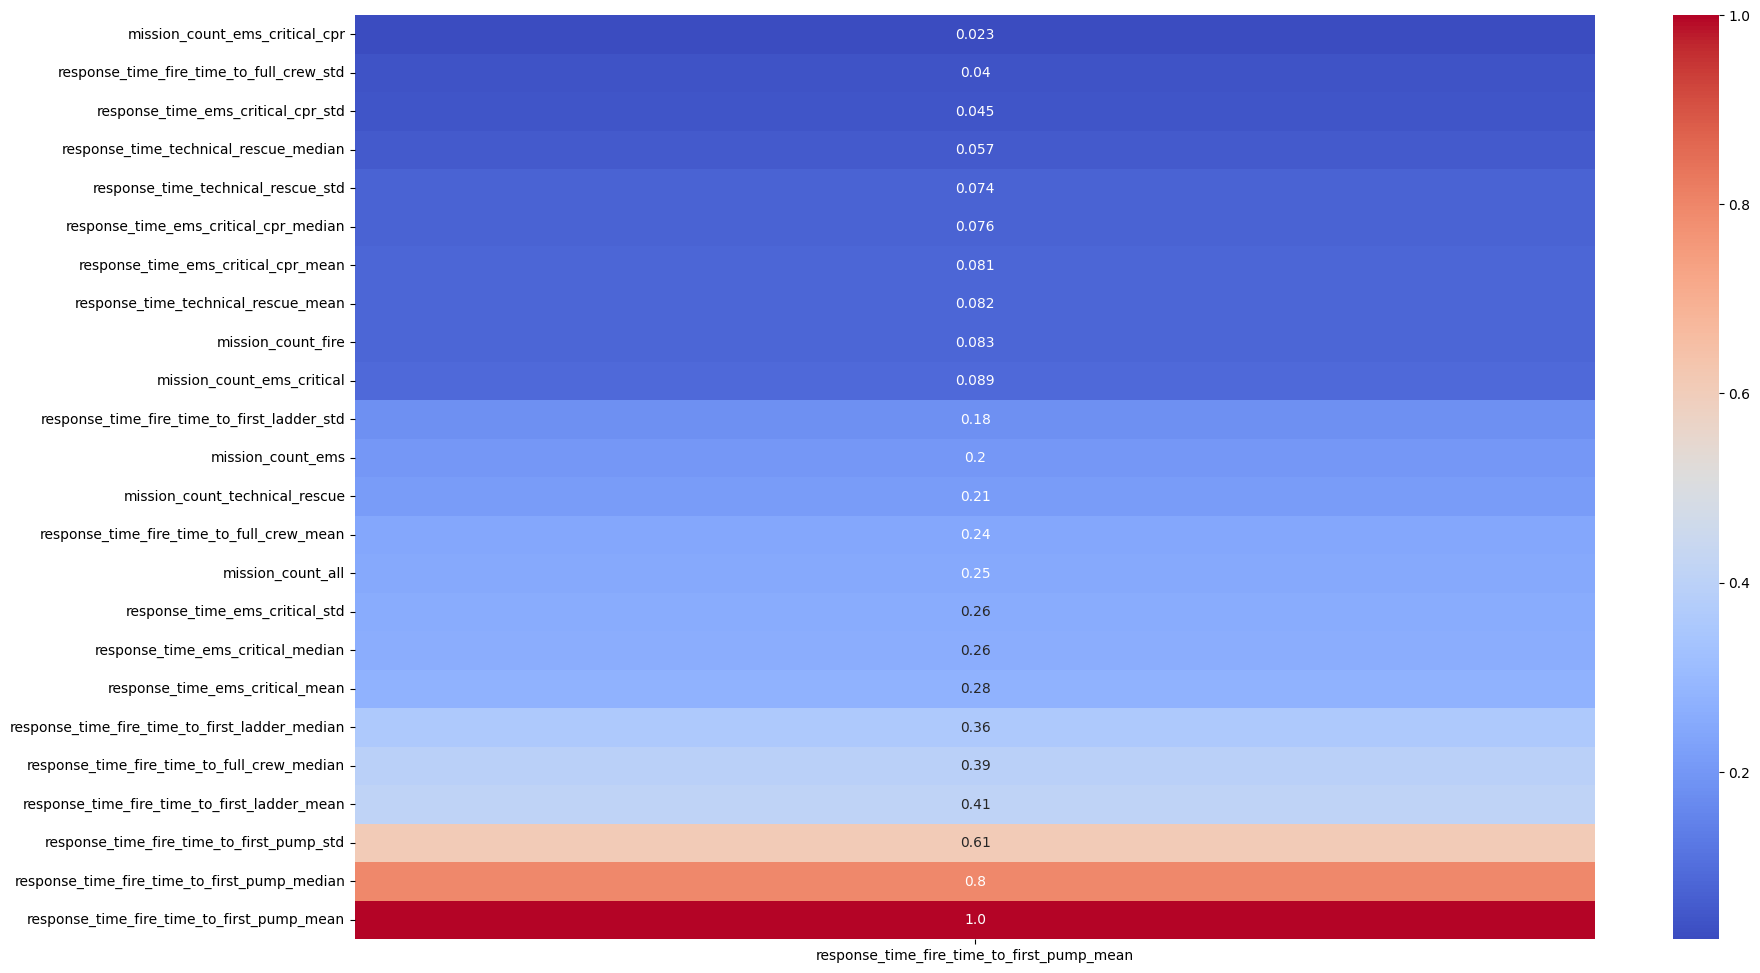

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))

sns.heatmap(corr_to_target, cmap="coolwarm", annot=True, fmt=".2")
# plt.xticks(rotation=90)
